<a href="https://colab.research.google.com/github/jai2shan/TSAI-EVA40-Assignments/blob/master/Session%207/Assignment_7_Trail_2_Buidling_CNN_with_Depthwise_SC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install asgnmt7-0.0.3-py3-none-any.whl

## Load the Packages

In [0]:
import torch

from asgnmt7.TrainTestLoader import *
from asgnmt7.ModelDepthwise import Net
from asgnmt7.ModelPerformance import *


## Loading and Viewing Data

Files already downloaded and verified
Files already downloaded and verified
  dog plane plane   car


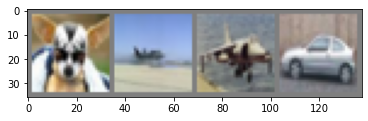

In [3]:
train_loader,test_loader,classes = TrainTestLoad()

ViewTrainingImages(train_loader)

## Loading and Viewing Model

In [4]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
net = Net().to(device)
net

Net(
  (convblock1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.1, inplace=False)
    (4): Conv2d(32, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (5): ReLU()
    (6): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.1, inplace=False)
  )
  (depthwise): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=128)
    (1): Conv2d(128, 64, kernel_size=(1, 1), stride=(1, 1))
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (convblock2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): ReLU()
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropo

In [5]:
from torchsummary import summary
summary(net, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5          [-1, 128, 32, 32]          36,864
              ReLU-6          [-1, 128, 32, 32]               0
       BatchNorm2d-7          [-1, 128, 32, 32]             256
           Dropout-8          [-1, 128, 32, 32]               0
            Conv2d-9          [-1, 128, 32, 32]           1,280
           Conv2d-10           [-1, 64, 32, 32]           8,256
        MaxPool2d-11           [-1, 64, 16, 16]               0
           Conv2d-12          [-1, 128, 16, 16]          73,728
             ReLU-13          [-1, 128, 16, 16]               0
      BatchNorm2d-14          [-1, 128,

## Buiiding Model

In [6]:
from asgnmt7.Training_Testing import TrainTest
import torch.optim as optim
import torch.nn as nn
from torch.optim.lr_scheduler import StepLR

tt = TrainTest()
test_acc = 0
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
scheduler = StepLR(optimizer, step_size=5, gamma=0.1)

for epoch in range(8):
    print("EPOCH:", epoch)
    tt.train_(net, device, train_loader, optimizer, epoch,L1 = False)
    scheduler.step()
    acc = tt.test_(net, device, test_loader) 
    
print('Finished Training')

  0%|          | 0/12500 [00:00<?, ?it/s]

EPOCH: 0


Loss=1.3201415538787842 Batch_id=12499 Accuracy=49.36: 100%|██████████| 12500/12500 [02:15<00:00, 92.54it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: 1.3746, Accuracy: 6047/10000 (60.47%)

EPOCH: 1


Loss=1.0128071308135986 Batch_id=12499 Accuracy=67.91: 100%|██████████| 12500/12500 [02:16<00:00, 91.88it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: 1.0554, Accuracy: 6651/10000 (66.51%)

EPOCH: 2


Loss=2.1260182857513428 Batch_id=12499 Accuracy=74.39: 100%|██████████| 12500/12500 [02:12<00:00, 94.12it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: 1.1378, Accuracy: 7124/10000 (71.24%)

EPOCH: 3


Loss=1.1040304899215698 Batch_id=12499 Accuracy=77.68: 100%|██████████| 12500/12500 [02:14<00:00, 92.97it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: 1.1684, Accuracy: 7209/10000 (72.09%)

EPOCH: 4


Loss=0.6315131187438965 Batch_id=12499 Accuracy=80.35: 100%|██████████| 12500/12500 [02:14<00:00, 93.08it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: 0.9736, Accuracy: 7615/10000 (76.15%)

EPOCH: 5


Loss=0.5186704397201538 Batch_id=12499 Accuracy=85.79: 100%|██████████| 12500/12500 [02:11<00:00, 94.97it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: 0.7991, Accuracy: 7887/10000 (78.87%)

EPOCH: 6


Loss=0.04039919376373291 Batch_id=12499 Accuracy=86.99: 100%|██████████| 12500/12500 [02:09<00:00, 96.72it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: 0.8409, Accuracy: 7868/10000 (78.68%)

EPOCH: 7


Loss=0.26854240894317627 Batch_id=12499 Accuracy=87.64: 100%|██████████| 12500/12500 [02:09<00:00, 96.71it/s]



Test set: Average loss: 0.7915, Accuracy: 7996/10000 (79.96%)

Finished Training


## Model Graphs

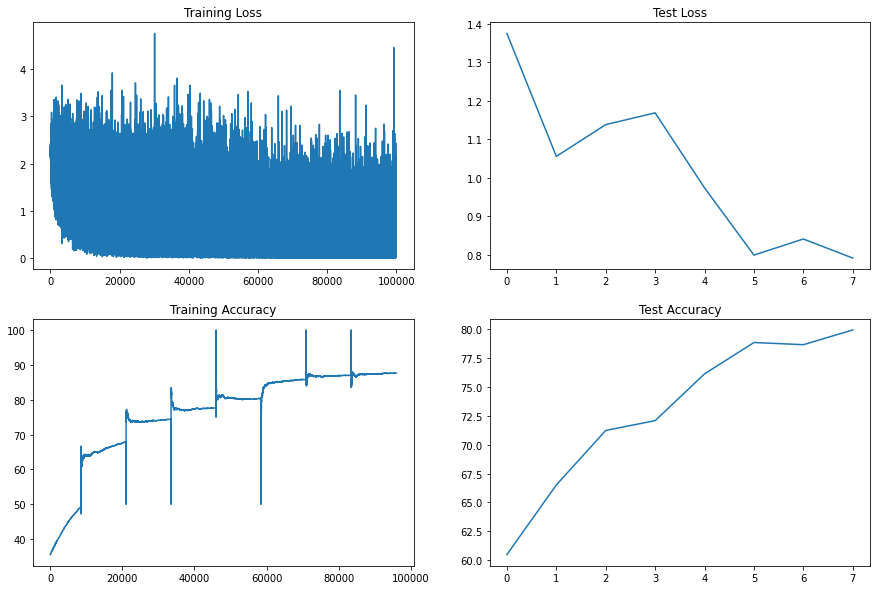

In [7]:
PlotTrainingGraphs(tt)

## View Model Performance

GroundTruth:    cat  ship  ship plane
Predicted:    cat  ship  ship plane
Accuracy of the network on the 10000 test images: 79 %
Accuracy of plane : 79 %
Accuracy of   car : 91 %
Accuracy of  bird : 66 %
Accuracy of   cat : 70 %
Accuracy of  deer : 81 %
Accuracy of   dog : 71 %
Accuracy of  frog : 80 %
Accuracy of horse : 86 %
Accuracy of  ship : 85 %
Accuracy of truck : 85 %


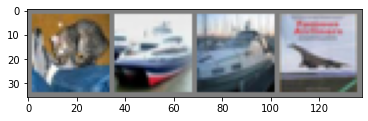

In [8]:
ViewModelPerformance(test_loader,net,classes,device)